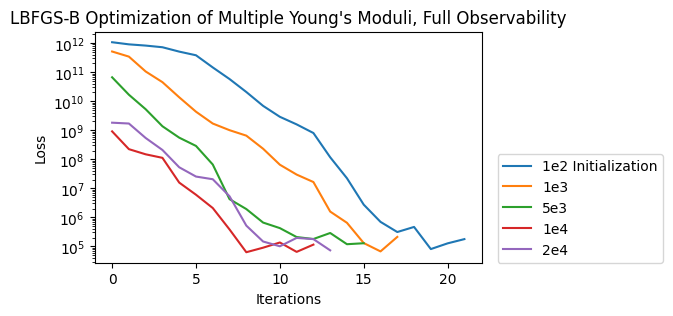

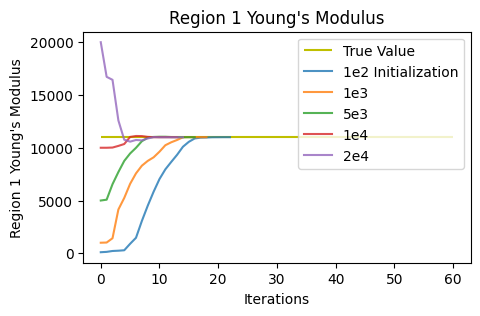

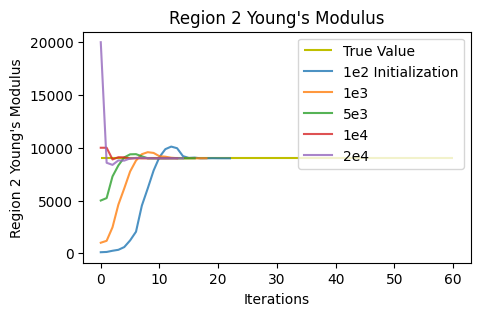

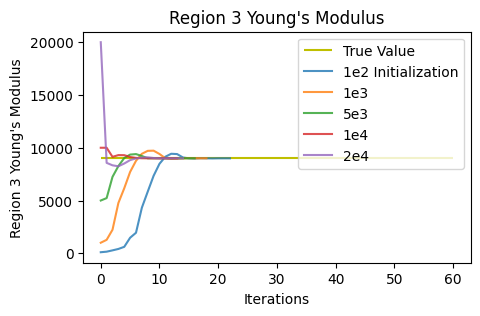

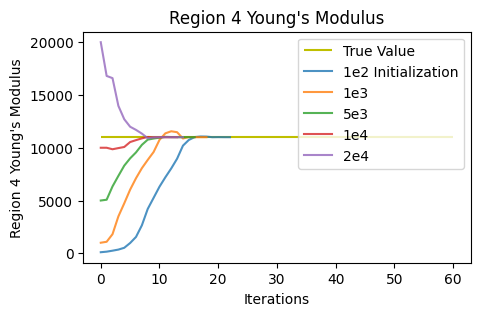

In [13]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e2.json',
    'result_1e3.json',
    'result_05e4.json',
    'result_e_opt.json',
    'result_2e4.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1e16, 1, 1]
labels = ['1e2 Initialization',
          '1e3', 
          '5e3',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Full Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


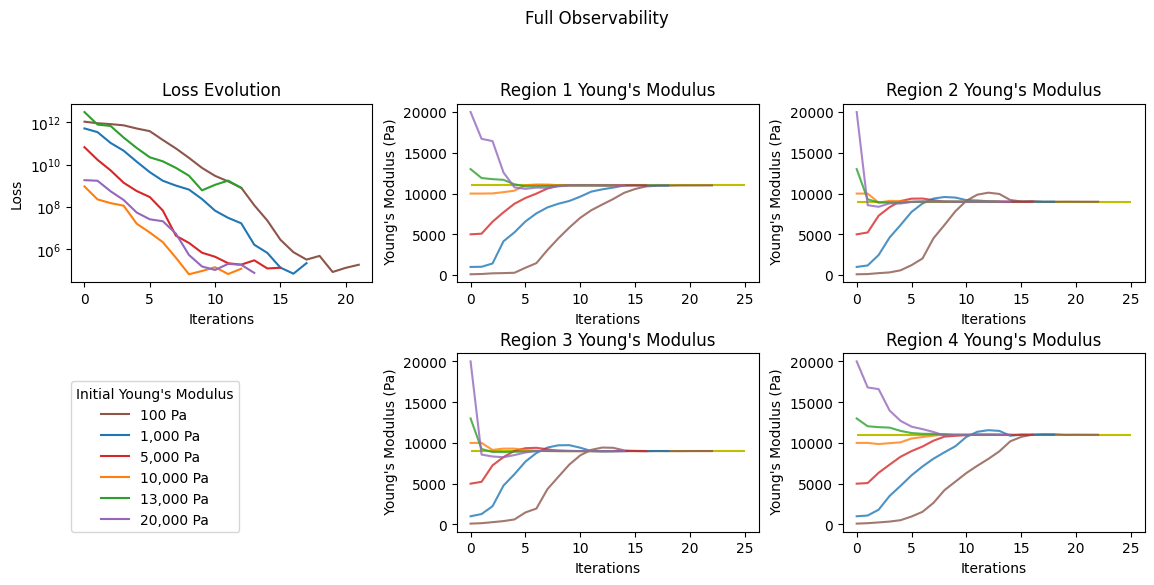

In [13]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_1e2.json',
    'result_1e3.json',
    'result_05e4.json',
    'result_e_opt.json',
    'result_13e4_full.json',
    'result_2e4.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1e16, 1e-16, 1, 1]
labels = ['100 Pa',
          '1,000 Pa', 
          '5,000 Pa',
          '10,000 Pa',
          '13,000 Pa',
          '20,000 Pa',
          '8 particles, $\epsilon_{xx}$']
colors = [
    'tab:brown',
    'tab:blue',
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:purple'
]

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Full Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], color=colors[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], color=colors[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
plt.show()


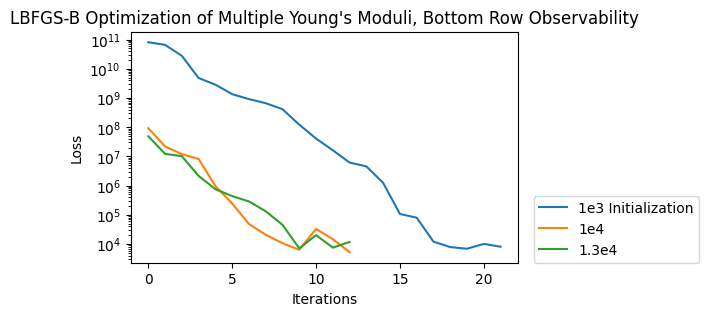

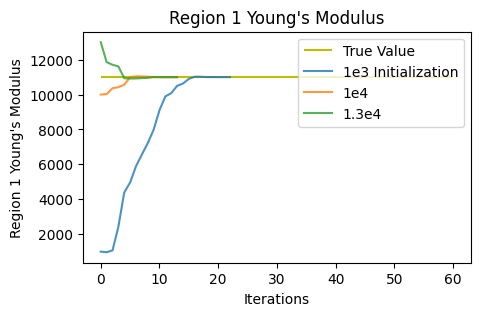

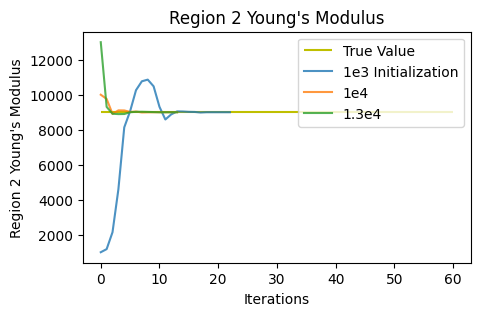

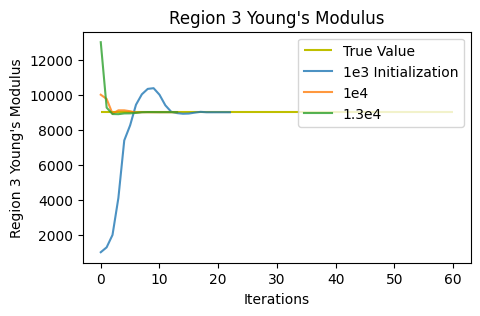

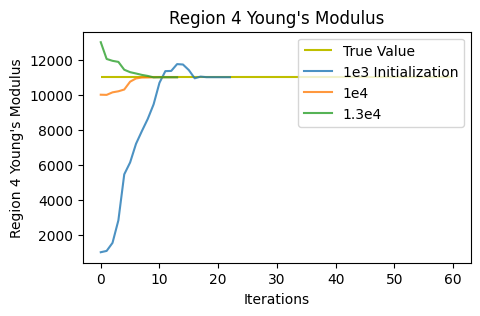

In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e3_row.json',
    'result_1e4_row.json',
    'result_13e4_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1e3 Initialization',
          '1e4', 
          '1.3e4',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Bottom Row Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


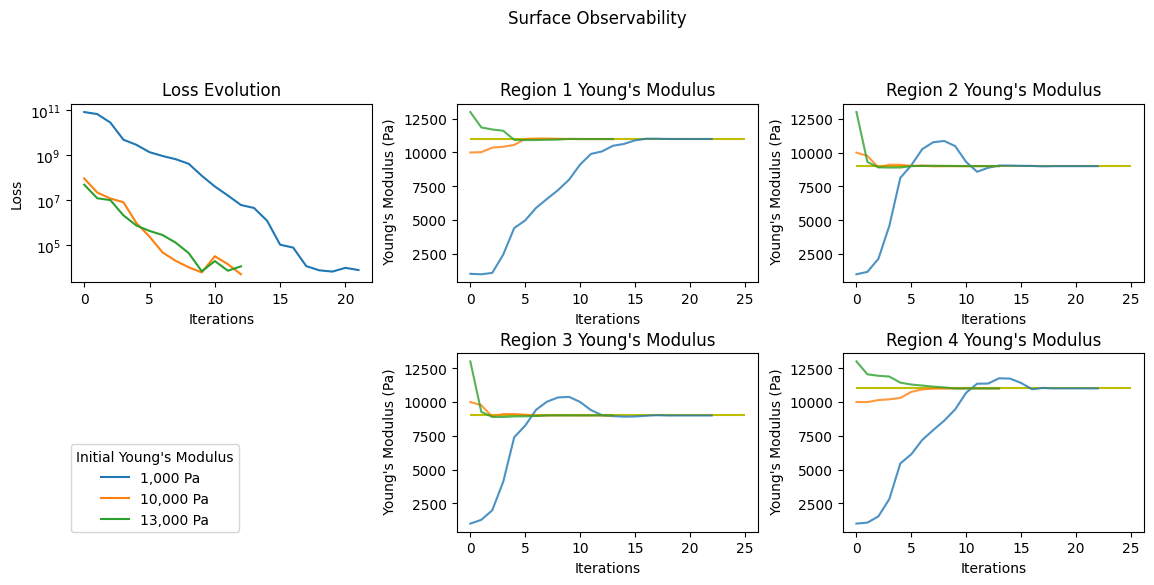

In [73]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_1e3_row.json',
    'result_1e4_row.json',
    'result_13e4_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1,000 Pa',
          '10,000 Pa', 
          '13,000 Pa',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
plt.show()


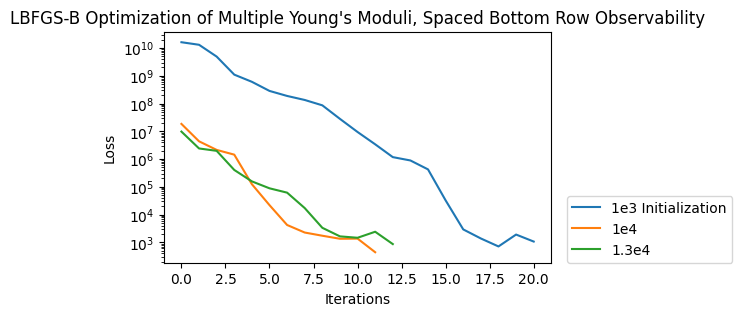

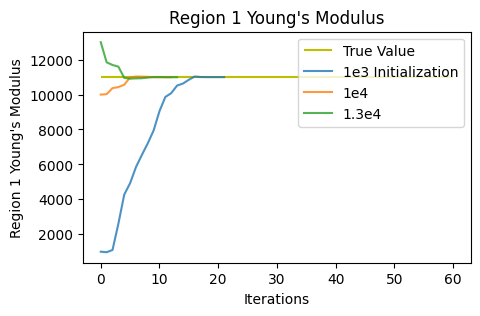

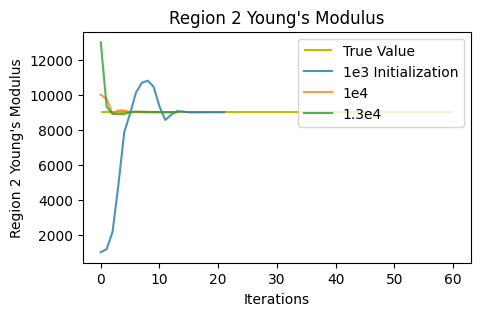

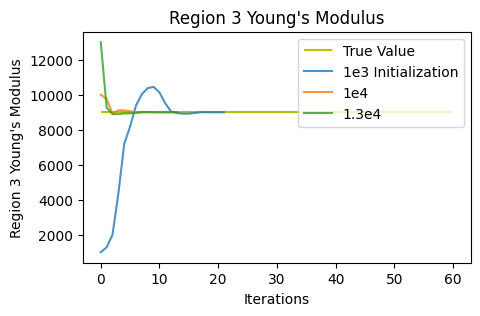

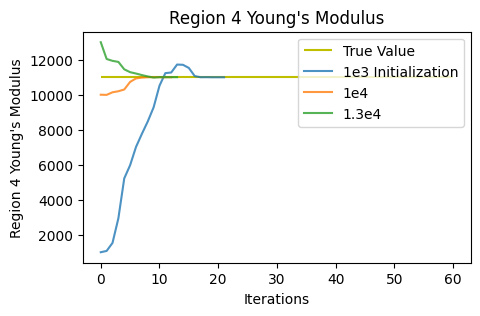

In [12]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e3_sensor.json',
    'result_1e4_sensor.json',
    'result_13e4_sensor.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1e-20, 1e-20, 1e-20, 1, 1, 1]
labels = ['1e3 Initialization',
          '1e4', 
          '1.3e4',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Spaced Bottom Row Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


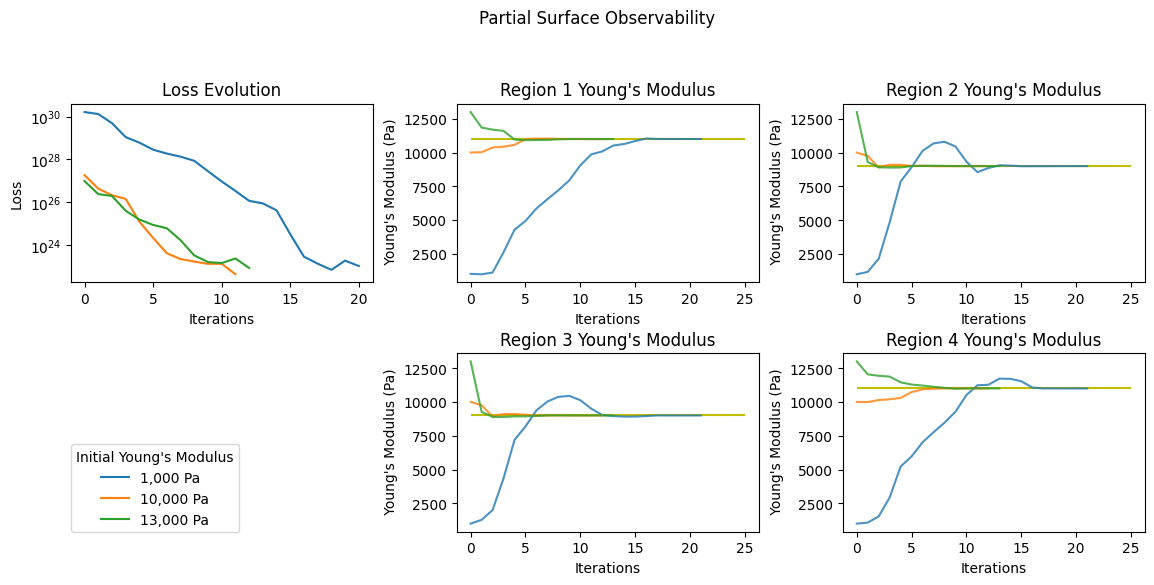

In [70]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_1e3_sensor.json',
    'result_1e4_sensor.json',
    'result_13e4_sensor.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1,000 Pa',
          '10,000 Pa', 
          '13,000 Pa',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Partial Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
plt.show()


[Taichi] Starting on arch=cuda


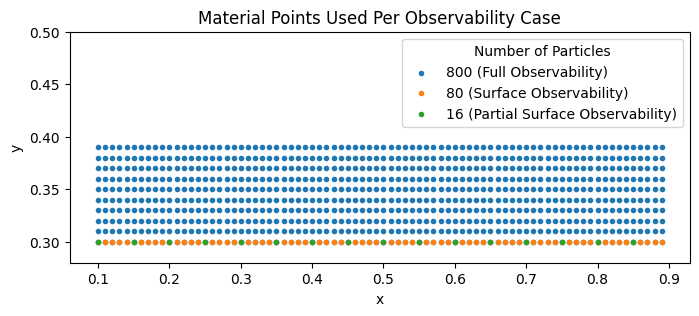

(800, 2)

In [2]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)
Nx = 80
Ny = 10
n_particles = Nx*Ny
x = ti.Vector.field(2,
                    dtype=real,
                    shape=(n_particles),
                    needs_grad=True)
for i in range(Nx):
    for j in range(Ny):
        x[j * Nx + i] = [(i)/(Nx) * 0.8 + 0.1, (j)/(Ny) * 0.1 + 0.3]

x = x.to_numpy()
plt.figure(figsize=(8,3))
plt.scatter(x[:,0], x[:,1], marker='.', label='800 (Full Observability)')
plt.scatter(x[:80,0], x[:80,1], marker='.', label='80 (Surface Observability)')
plt.scatter(x[:80,0][::5], x[:80,1][::5], marker='.', label='16 (Partial Surface Observability)')
plt.legend(title='Number of Particles')
plt.title('Material Points Used Per Observability Case')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((0.28,0.5))
plt.show()
x.shape